In [2]:
# Pour éviter les warnings non bloquant lié aux différentes versions de librairies
import warnings
warnings.filterwarnings("ignore")

# Exploration des données

Importer le fichier depuis le stockage local du pc

In [1]:
# Importer des fichiers dans colab depuis un stockage local
from google.colab import files
files.upload()

Saving data_v1.0.csv to data_v1.0.csv


{'data_v1.0.csv': b',index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche\r\n0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0\r\n1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0\r\n2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.5,non,0\r\n3,3,2011-07-01,brun,,12.0,32442.0,M,licence,geologie,45.09,non,0\r\n4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0\r\n5,5,2014-02-12,chatain,37.0,8.0,38558.0,M,master,geologie,63.46,non,1\r\n6,6,2013-11-11,brun,33.0,12.0,39476.0,M,master,geologie,50.2,oui,0\r\n7,7,2012-03-10,roux,31.0,10.0,42392.0,M,licence,forage,62.2,oui,0\r\n8,8,2014-10-17,chatain,43.0,10.0,28625.0,M,doctorat,geologie,65.17,non,1\r\n9,9,2011-06-04,chatain,28.0,11.0,32454.0,M,master,forage,66.93,non,1\r\n10,10,2014-08-06,brun,50.0,12.0,38516.0,F,licence,geologie,58.93,non,0\r\n11,11,2010-04-22,blond,43.0,8.0,38719.0,M,master,archeologie,80.07,oui,0\r\n12,12,2011-10-23,brun,44.0,9.0,28

Import des librairies nécessaires

In [3]:
# Import des librairies nécessaires
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("data_v1.0.csv", parse_dates=["date"]) # on précise que nous voulons la colonne date de type date.
df.dtypes

Unnamed: 0             int64
index                  int64
date          datetime64[ns]
cheveux               object
age                  float64
exp                  float64
salaire              float64
sexe                  object
diplome               object
specialite            object
note                 float64
dispo                 object
embauche               int64
dtype: object

In [5]:
# Connaître la taille de son jeu de données est très important,
# étant donné que ça donne déjà une idée sur le temps que ça prendra pour le décrire et le modéliser,
# que ce soit en terme de temps humain où le temps nécessaire à la machine pour faire tourner les différents algorithmes
df.shape

(20000, 13)

In [6]:
# Regardons quelques lignes de notre jeu de données
df.head()

,Unnamed: 0,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


In [7]:
print(set(df["Unnamed: 0"] == df["index"]))
# La colonne Unnamed: 0 est la même que celle de l'index (elle a sûrement été créée lors de l'enregristrement).
# Ainsi, on peut drop Unnamed: 0 et index qui nous ne servirons pas pour la suite étant donné que nous avons l'indexation de pandas
df = df.drop(["Unnamed: 0", "index"],axis = 1)

{True}


In [8]:
df.head()

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


In [9]:
# Voyons s'il y a des lignes répétées dans notre jeu de données.
df.duplicated().sum()
# Nous avons 0 duplicate dans notre jeu de données

0

In [10]:
## On commence par chercher si notre jeu de données comporte des données manquantes
df.isna().any().any()
# On a bien des données manquantes quelque part dans notre jeu de données, trouvons où exactement et de combien.

True

In [12]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull()) # calcul de la moyenne du nombre de valeurs manquantes sur une colonne
    print('{} - {}% - {}'.format(col, round(pct_missing*100,1),np.sum(df[col].isnull())))
# On remarque que seul la variable embauche contient toutes ses données.
# Cela dit, le nombre de valeur manquante par colonne n'est pas très grand (de l'ordre de 0.5%) par rapport au nombre total de données

date - 0.5% - 91
cheveux - 0.5% - 103
age - 0.5% - 91
exp - 0.5% - 96
salaire - 0.5% - 95
sexe - 0.5% - 100
diplome - 0.5% - 110
specialite - 0.5% - 93
note - 0.6% - 114
dispo - 0.5% - 106
embauche - 0.0% - 0


In [14]:
# Voyons voir si ces données manquantes sont plus présentes dans certaines lignes ou si elles sont disposées aléatoirement.
new_data = df.drop(["embauche"], axis = 1) # on retire la colonne où il n'y a aucune valeur manquante et celle qui est notre VAE
new_data = new_data.dropna(axis = 0, how ='all') # on retire toutes les lignes où il y a que des valeurs manquantes
new_data.shape
# la première information est qu'il n'y a pas de lignes avec uniquement des valeurs manquantes.

(20000, 10)

In [15]:
# On regarde toutes les lignes avec des valeurs manquantes
#pd.options.display.max_rows = None  # retirer le commentaire si vous souhaitez voir la totalité des lignes des Dataframe
missing_df = df[df.isnull().any(axis = 1)]

In [16]:
clean_df = df.dropna() # jeux de données sans valeurs manquantes

In [17]:
# Import de la fonction Counter
from collections import Counter

In [18]:
missing_per = Counter(clean_df["embauche"])[1]/Counter(clean_df["embauche"])[0] # pourcentage de personnes embauchées dans le jeu de données qui ne contient aucune valeur manquante
total_per = Counter(df["embauche"])[1]/Counter(df["embauche"])[0] # pourcentage de personnes embauchées dans le jeu de données original
print("Pourcentage de personnes embauchées dans le jeu de données qui ne contient aucune valeur manquante :",missing_per)
print("Pourcentage de candidats embauchés total :",total_per)

Pourcentage de personnes embauchées dans le jeu de données qui ne contient aucune valeur manquante : 0.1293789336183351
Pourcentage de candidats embauchés total : 0.12943302462163994


Le pourcentage des gens qui ont été embauché est quasiment le même dans le jeu de données original que dans celui sans valeurs manquantes et étant donné que le nombre de ligne avec valeur manquante ( = 979) est inférieur à 5% de nos données totales. Le fait de les retirer pour avoir des données réelles propres est une bonne idée.
On aurait pu essayer de combler les valeurs manquantes avec quelques méthodes (moyenne, médiane,0 , avec respect de la similitude etc) mais dans le cas où on ne perd  que 5% de nos données en les supprimant, on préfère les supprimer et être sûr que mes données correspondent aux données enregistrées par l'entreprise (on verra après qu'il y a des valeurs qui montrent que ces valeurs là ne sont pas toujours réelles. exemple: âge négatif = problème lors de la saisie de l'information).

In [19]:
def percentage_of_change(df,clean_df,col):
    # Etant donné un dataframe et le dataframe sans valeurs manquantes et une colonne,
    # cette fonction retourne le pourcentage de changement de distribution de chaque élément de la colonne
    l = list(df[col])
    clean_l = list(clean_df[col])
    c = Counter(l)
    clean_c = Counter(clean_l)
    
    return [(i, abs(((c[i] / len(l))-(clean_c[i] / len(clean_l))) * 100.0)) for i in c]

In [20]:
# on veut voir le changement de distribution des colonnes catégorielles entre le df original et le df sans valeurs manquantes.
# on utilise une différence entre la moyenne de présence de chaque élément dans chaque df et ainsi on évite que la taille d'un des df n'influe dans nos calculs
for col in ["cheveux","sexe","diplome","specialite","dispo","embauche"]: 
    print(col)
    print(percentage_of_change(df,clean_df,col))
# on remarque que les plus gros changements de distribution et de l'ordre de 0.34% au niveau de la disponibilité 'non'
# Ainsi, notre choix de supprimer les lignes avec valeurs manquantes n'induit pas un très grand changement dans la distribution des valeurs par colonne catégorielle
# et donc, on pourrait s'attendre à avoir des résultats assez convaincant même en supprimant ces lignes.

cheveux
[('roux', 0.13509936386099514), ('blond', 0.08004074444035725), ('brun', 0.14331239156721853), ('chatain', 0.1565475001314376), (nan, 0.515)]
sexe
[('F', 0.24782319541559183), ('M', 0.25217680458440306), (nan, 0.5)]
diplome
[('licence', 0.23712817412333553), ('master', 0.16172309552600073), ('doctorat', 0.09292702802166097), ('bac', 0.05822170232900464), (nan, 0.5499999999999999)]
specialite
[('geologie', 0.21487093212765318), ('forage', 0.1705641133484037), ('detective', 0.049352031964672305), ('archeologie', 0.03021292255927649), (nan, 0.46499999999999997)]
dispo
[('non', 0.33625782030387574), ('oui', 0.19374217969612695), (nan, 0.53)]
embauche
[(0, 0.00424057620524998), (1, 0.004240576205245816)]


In [21]:
# on veut voir le changement de distribution des colonnes continues entre le df original et le df sans valeurs manquantes.
# Changement de moyenne et de variance sur les variables continues si on supprime les lignes avec valeurs manquantes.
print("Le changement de moyenne si on supprime les lignes avec valeurs manquantes est de : ")
for col in ["age","exp","salaire","note"]:
    clean_mean = clean_df[col].mean()
    mean = df[col].mean()
    print(col, abs(((mean - clean_mean)/mean)*100))
print("Le changement de variance si on supprime les lignes avec valeurs manquantes est de : ")
for col in ["age","exp","salaire","note"]:    
    clean_var = clean_df[col].var()
    var = df[col].var()
    print(col, abs(((var - clean_var)/var)*100))
    
# le plus gros changements est de l'orde de 0.19% ce qui est très négligeable.

Le changement de moyenne si on supprime les lignes avec valeurs manquantes est de : 
age 0.016368624214251337
exp 0.03884175722764659
salaire 0.021344848377267148
note 0.02086461086051915
Le changement de variance si on supprime les lignes avec valeurs manquantes est de : 
age 0.06047837325077001
exp 0.053501955734846444
salaire 0.0843207885874689
note 0.1893195494263474


In [22]:
# Etant donné que le fait de retirer les lignes avec valeurs manquantes n'induit pas un grand changement de distribution alors on les supprimes
new_df = df.dropna(axis = 0, how ='any')
new_df

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
5,2014-02-12,chatain,37.0,8.0,38558.0,M,master,geologie,63.46,non,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,2012-03-10,roux,47.0,9.0,35723.0,M,licence,geologie,66.47,non,0
19996,2010-09-19,chatain,38.0,10.0,33570.0,F,master,geologie,62.29,non,1
19997,2010-09-02,chatain,23.0,6.0,33751.0,F,doctorat,detective,103.48,oui,0
19998,2011-12-06,chatain,33.0,11.0,34167.0,F,licence,detective,73.35,non,0


Traitement des valeurs aberrantes

In [23]:
# Afin de continuer le traitement de la donnée, vérifions qu'il n'y a pas de données aberrantes.
# Tout d'abord l'âge est une donnée censée être supérieur ou égale à 16 (loi contre le travail des enfants (varie selon le pays)) 
# Ainsi, le candidat ne peux pas avoir un âge - année d'expérience inférieur à 16 sinon il aurait commencé le travail avant ses 16 ans.
new_df = new_df[new_df["age"]-new_df["exp"]>=16]
# ceci nous conduit à supprimer environ 3000 lignes.
new_df

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
5,2014-02-12,chatain,37.0,8.0,38558.0,M,master,geologie,63.46,non,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,2012-03-10,roux,47.0,9.0,35723.0,M,licence,geologie,66.47,non,0
19996,2010-09-19,chatain,38.0,10.0,33570.0,F,master,geologie,62.29,non,1
19997,2010-09-02,chatain,23.0,6.0,33751.0,F,doctorat,detective,103.48,oui,0
19998,2011-12-06,chatain,33.0,11.0,34167.0,F,licence,detective,73.35,non,0


In [24]:
# la même réflexion peut être porté sur l'expérience du candidat qui est censée être supérieur ou égale à 0.
new_df = new_df[new_df["exp"]>=0]
new_df
# 2 lignes sont retirées

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
5,2014-02-12,chatain,37.0,8.0,38558.0,M,master,geologie,63.46,non,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,2012-03-10,roux,47.0,9.0,35723.0,M,licence,geologie,66.47,non,0
19996,2010-09-19,chatain,38.0,10.0,33570.0,F,master,geologie,62.29,non,1
19997,2010-09-02,chatain,23.0,6.0,33751.0,F,doctorat,detective,103.48,oui,0
19998,2011-12-06,chatain,33.0,11.0,34167.0,F,licence,detective,73.35,non,0


In [25]:
# le salaire souhaité est censé aussi être une valeur positive (voire même supérieur au smic mais on se limitera à ce qu'il soit positif)
new_df = new_df[new_df["salaire"]>=0]
new_df
# Toutes les lignes respectent ce critère

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
5,2014-02-12,chatain,37.0,8.0,38558.0,M,master,geologie,63.46,non,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,2012-03-10,roux,47.0,9.0,35723.0,M,licence,geologie,66.47,non,0
19996,2010-09-19,chatain,38.0,10.0,33570.0,F,master,geologie,62.29,non,1
19997,2010-09-02,chatain,23.0,6.0,33751.0,F,doctorat,detective,103.48,oui,0
19998,2011-12-06,chatain,33.0,11.0,34167.0,F,licence,detective,73.35,non,0


In [26]:
# la note doit être entre 0 et 100, ainsi toute valeur inférieur à 0 sera mise à 0 et toute valeure supérieur à 100 sera mise à 100
new_df["note"] = new_df["note"].apply(lambda x : 0 if x< 0 else x)
new_df["note"] = new_df["note"].apply(lambda x : 100 if x> 100 else x)
new_df

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
5,2014-02-12,chatain,37.0,8.0,38558.0,M,master,geologie,63.46,non,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,2012-03-10,roux,47.0,9.0,35723.0,M,licence,geologie,66.47,non,0
19996,2010-09-19,chatain,38.0,10.0,33570.0,F,master,geologie,62.29,non,1
19997,2010-09-02,chatain,23.0,6.0,33751.0,F,doctorat,detective,100.00,oui,0
19998,2011-12-06,chatain,33.0,11.0,34167.0,F,licence,detective,73.35,non,0


### Relation entre les variables 

In [27]:
#import de librairies
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

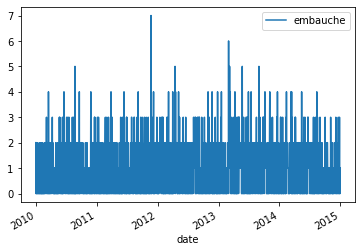

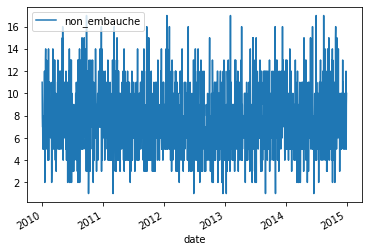

In [28]:
# Voyons comment évolue l'embauche et le refus d'embauche avec le temps.
df_evolve = new_df[["date","embauche"]]
embauche = df_evolve.groupby(["date"]).sum() # nombre de candidats acceptés par jour
df_evolve["embauche"] = df_evolve["embauche"].apply(lambda x : 1 if x == 0 else 0) # on interverti les 1 et les 0 dans la colonne embauche pour calculer le nombre de refus de candidature 
non_embauche = df_evolve.groupby(["date"]).sum() # nombre de candidats refusés par jour
non_embauche.columns = ["non_embauche"] # changement du nom de la colonne

plt.figure()
embauche.plot() # Evolution du nombre de candidats acceptés par jour
non_embauche.plot() # Evolution du nombre de candidats refusés par jour

# Dans cette figure nous pouvons remarquer que le nombre de refus(non embauche) par jour suit plus au moins une loi gaussienne de moyenne 9.2, 
#(Gaussienne du nombre de non embauche par rapport à la date (inverse des axes du graphe pour une vision plus classique de la gaussienne).
# Tandis qu'en ce qui concerne l'évolution du nombre d'embauche par jour, elle ne suit pas une loi de distribution particulière.
# Ainsi la date (dans sa forme actuelle) ne devrait pas avoir une très grande importance dans l'explication de l'embauche ou non.

<Figure size 432x288 with 0 Axes>

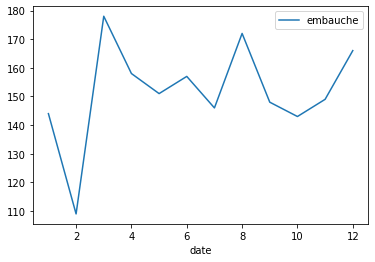

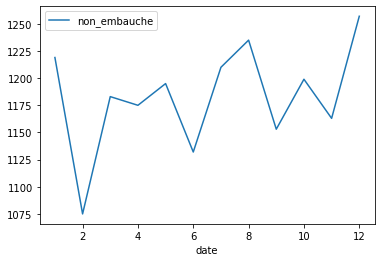

In [30]:
# Voyons s'il n'y a pas de sésonalité du recrutement (selon le mois de la candidature)
# On reprend la même logique que les graphes d'avant sauf qu'on utilise un groub by par mois et non plus par date.
df_evolve = new_df[["date","embauche"]]
df_evolve["date"] = df_evolve.date.dt.month
embauche = df_evolve.groupby(["date"]).sum()
df_evolve["embauche"] = df_evolve["embauche"].apply(lambda x : 1 if x == 0 else 0)
non_embauche = df_evolve.groupby(["date"]).sum()
non_embauche.columns = ["non_embauche"]
plt.figure()
embauche.plot()
non_embauche.plot()

# on remarque qu'il y a une différence de réparatiion des candidatures à succès et non selon le mois de candidature.

# ainsi le mois de la candidature sera un critère avec une certaine importance dans le succès ou non d'une candidature

# Ce critère est très raisonnable du fait que généralement les entreprises ont des périodes de recrutement, et il est possible qu'OrFée ait un système comparable

<Figure size 432x288 with 0 Axes>

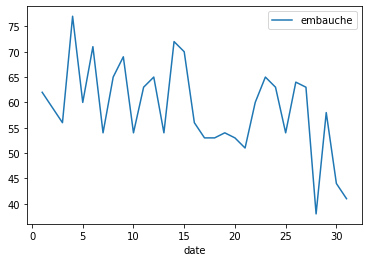

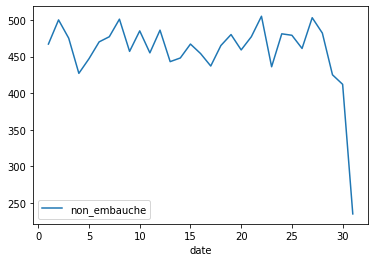

In [31]:
# Voyons s'il n'y a pas de sésonalité du recrutement (selon le jour de la candidature)
# On reprend la même logique que les graphes d'avant sauf qu'on utilise un groub by par jour et non plus par mois.
df_evolve = new_df[["date","embauche"]]
df_evolve["date"] = df_evolve.date.dt.day
embauche = df_evolve.groupby(["date"]).sum()
df_evolve["embauche"] = df_evolve["embauche"].apply(lambda x : 1 if x == 0 else 0)
non_embauche = df_evolve.groupby(["date"]).sum()
non_embauche.columns = ["non_embauche"]
plt.figure()
embauche.plot()
non_embauche.plot()

# on remarque qu'il y a une différence de réparatiion des candidatures à succès et non selon le jour de candidature.

# ainsi le jour de la candidature pourra être un critère avec une certaine importance dans le succès ou non d'une candidature.

<Figure size 432x288 with 0 Axes>

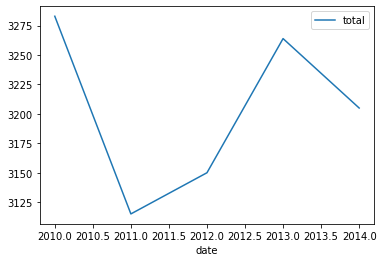

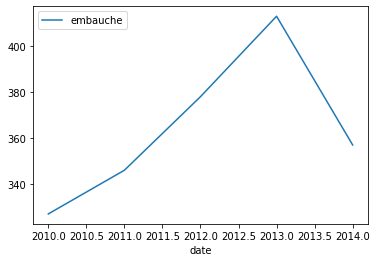

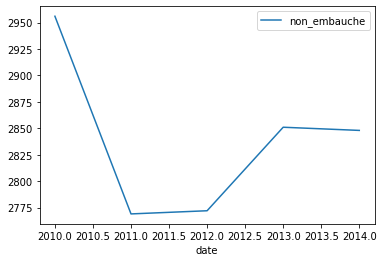

In [32]:
# Voyons s'il y a une évolution selon l'année de candidature
# On reprend la même logique que les graphes d'avant sauf qu'on utilise un groub by par année et non plus par jour et on ajoute le graphe total
df_evolve = new_df[["date","embauche"]]
df_evolve["date"] = df_evolve.date.dt.year
embauche = df_evolve.groupby(["date"]).sum()
df_evolve["embauche"] = df_evolve["embauche"].apply(lambda x : 1 if x == 0 else 0)
non_embauche = df_evolve.groupby(["date"]).sum()
non_embauche.columns = ["non_embauche"]

df_evolve["embauche"] = df_evolve["embauche"].apply(lambda x : 1) # pour avoir le compte total de toutes les candidatures (refusées ou non)
total = df_evolve.groupby(["date"]).sum()
total.columns = ["total"]

plt.figure()
total.plot()
embauche.plot()
non_embauche.plot()
# on remarque que les courbes suivent la même tendance sauf pendant entre 2010 et 2011 où la tendance est à la baisse sauf pour les candidats embauchés
# De plus, le nombre de candidature qui diffère d'un an à un autre peut difficillement être expliqué par l'année en elle même (voire d'autres facteurs, économique, social etc)
# Ainsi, l'année sera peut être un facteur qui nous aidera à expliquer l'embauche ou non d'un candidat.

<Figure size 432x288 with 0 Axes>

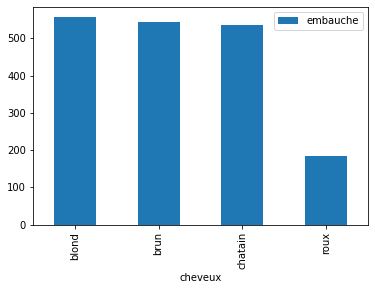

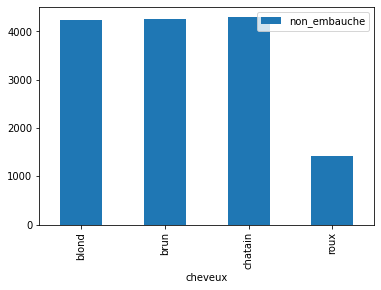

In [33]:
# Essayons de voir si on arrive à repérer une dépendance entre la couleur des cheveux et le succès ou non d'une candidature.
df_evolve = new_df[["cheveux","embauche"]]
embauche = df_evolve.groupby(["cheveux"]).sum()
df_evolve["embauche"] = df_evolve["embauche"].apply(lambda x : 1 if x == 0 else 0)
non_embauche = df_evolve.groupby(["cheveux"]).sum()
non_embauche.columns = ["non_embauche"]
plt.figure()
embauche.plot.bar() # la distribution du nombre d'embauche selon la couleur de cheuveux chez la population recrutée
non_embauche.plot.bar() # la distribution du nombre d'embauche selon la couleur de cheuveux chez la population rejetée

# on remarque que la distribution du nombre d'embauche selon la couleur de cheuveux est quasiment la même que 
# celle du nombre de non embauche selon la couleur de cheveux
# Ainsi, La couleur de cheveux ne devrait jouer aucun rôle dans le fait que le candidat soit embauché ou pas. 
# Cette information peut nous conforter sur l'idée que l'entreprise ne prend pas de décisions basées sur le physique du candidat.

<Figure size 432x288 with 0 Axes>

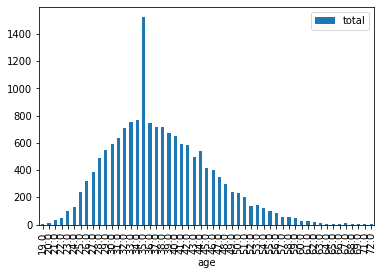

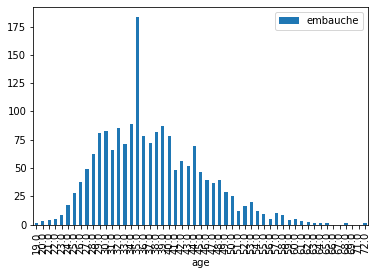

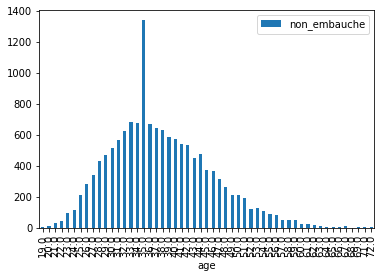

In [34]:
# Essayons de voir si on arrive à repérer une dépendance entre l'âge et l'embauche ou non
df_evolve = new_df[["age","embauche"]]
embauche = df_evolve.groupby(["age"]).sum()
df_evolve["embauche"] = df_evolve["embauche"].apply(lambda x : 1 if x == 0 else 0)
non_embauche = df_evolve.groupby(["age"]).sum()
non_embauche.columns = ["non_embauche"]
df_evolve["embauche"] = df_evolve["embauche"].apply(lambda x : 1)
total = df_evolve.groupby(["age"]).sum()
total.columns = ["total"]

plt.figure()
total.plot.bar() # ditribution de l'âge de tous les candidats
embauche.plot.bar()# ditribution de l'âge des candidats embauchés
non_embauche.plot.bar()# ditribution de l'âge des candidats non-embauchés

# On remarque que les 3 figures représentent bien une gaussienne avec un très grand pic pour les 35 ans dans les trois cas.
# Cela dit on remarque qu'il y a une légère différence sur la courbe des embauches qui est moins lisse que les 2 autres
# Ainsi, l'âge sera un facteur qui nous aidera à expliquer l'embauche ou non d'un candidat.

<Figure size 432x288 with 0 Axes>

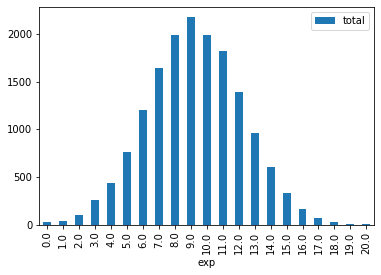

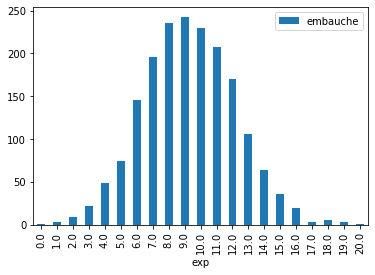

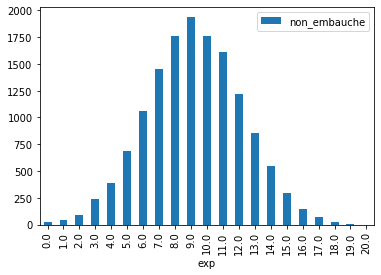

In [35]:
# Essayons de voir si on arrive à repérer une dépendance entre l'experience et l'embauche ou non
df_evolve = new_df[["exp","embauche"]]
embauche = df_evolve.groupby(["exp"]).sum()
df_evolve["embauche"] = df_evolve["embauche"].apply(lambda x : 1 if x == 0 else 0)
non_embauche = df_evolve.groupby(["exp"]).sum()
non_embauche.columns = ["non_embauche"]
df_evolve["embauche"] = df_evolve["embauche"].apply(lambda x : 1)
total = df_evolve.groupby(["exp"]).sum()
total.columns = ["total"]

plt.figure()
total.plot.bar()# ditribution de l'expérience de tous les candidats
embauche.plot.bar()# ditribution de l'expérience des candidats embauchés
non_embauche.plot.bar()# ditribution de l'expérience des candidats non-embauchés

# La aussi nous avons une distribution gaussienne du nombre d'embauche selon l'expérience des candidats.
# La distribution est quasi similaire dans le cas du succès de la candidature ou non. Cela dit, on remarque que la distribution dans
# le cas de l'échèc de la candidature est plus semblable à la distribution total des candidats.
# On peut remarquer de légères différences dans le cas où la candidature a été couronnée de succès.
# Ainsi, l'expérience sera un critère déterminant dans l'embauche ou non du candidat (ce résultat est quasiment évident étant 
# donné que l'expérience est bien connu pour être un critère majeur dans l'embauche.)

<Figure size 432x288 with 0 Axes>

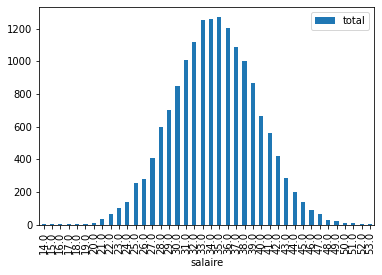

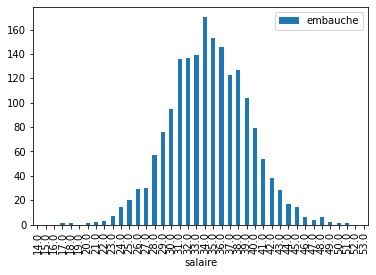

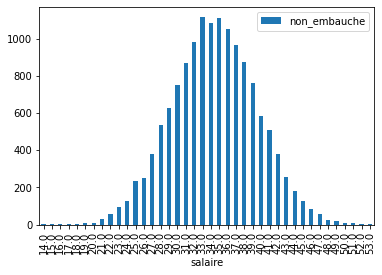

In [36]:
# Intéressons nous désormais à l'impact du salaire souhaité par le candidat dans le succès ou non de sa candidature.
df_evolve = new_df[["salaire","embauche"]]
df_evolve["salaire"] = df_evolve["salaire"].apply(lambda x : x//1000) # j'arrondie vers le bas les salaires au millier le plus proche (exemple : 21800 devient 21 000)
# et pour faciliter l'affichage on prend une échelle de 1000 (ainsi 21 000 devient 21)
embauche = df_evolve.groupby(["salaire"]).sum()
df_evolve["embauche"] = df_evolve["embauche"].apply(lambda x : 1 if x == 0 else 0)
non_embauche = df_evolve.groupby(["salaire"]).sum()
non_embauche.columns = ["non_embauche"]
df_evolve["embauche"] = df_evolve["embauche"].apply(lambda x : 1)
total = df_evolve.groupby(["salaire"]).sum()
total.columns = ["total"]

plt.figure()
total.plot.bar()
embauche.plot.bar()
non_embauche.plot.bar()

# Nous avons toujours une distribution gaussienne des salaires demandés selon le nombre de candidats demandant se montant.
# Cela dit, on remarque une différence de distribution entre les candidats embauchés et ceux qui ne le sont pas.
# Ainsi, le critère du salaire joue un rôle dans le succès ou non d'une candidature.

<Figure size 432x288 with 0 Axes>

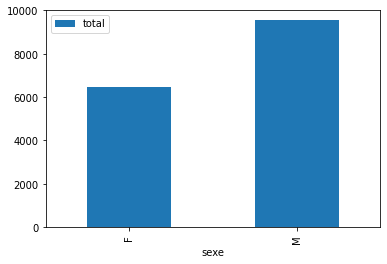

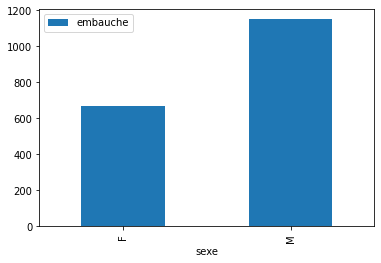

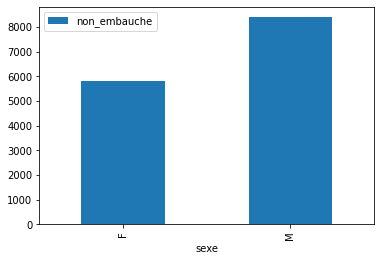

In [37]:
# Intéressons nous désormais à l'impact du sexe du candidat dans le succès ou non de sa candidature.
df_evolve = new_df[["sexe","embauche"]]
embauche = df_evolve.groupby(["sexe"]).sum()
df_evolve["embauche"] = df_evolve["embauche"].apply(lambda x : 1 if x == 0 else 0)
non_embauche = df_evolve.groupby(["sexe"]).sum()
non_embauche.columns = ["non_embauche"]
df_evolve["embauche"] = df_evolve["embauche"].apply(lambda x : 1)
total = df_evolve.groupby(["sexe"]).sum()
total.columns = ["total"]

plt.figure()
total.plot.bar()# la distribution du nombre d'embauche selon le sexe chez la population totale
embauche.plot.bar()# la distribution du nombre d'embauche selon le sexe chez la population embauchée
non_embauche.plot.bar()# la distribution du nombre d'embauche selon le sexe chez la population refusée

# on remarque une présence moindre des femmes dans la population des personnes embauchées, vérifions cela numériquement.

In [38]:
print("Pourcentage de femmes total :",total['total']['F']/(total['total']['F']+total['total']['M']))
print("Pourcentage de femmes parmi les embauchés :",embauche['embauche']['F']/(embauche['embauche']['F']+embauche['embauche']['M']))
print("Pourcentage de femmes parmi les refusés :",non_embauche['non_embauche']['F']/(non_embauche['non_embauche']['F']+non_embauche['non_embauche']['M']))
# Nous remarquons numériquement, que le pourcentage de femmes parmi les embauchés est bien en deça de celui des femmes parmi tous les candidats
# Il serait imprudent, d'accuser directement le recrutement de préviligier les hommes étant donnés que cela peut être dû à d'autres facteurs 
# qui eux sont reliés au profil type des femmes candidates.

Pourcentage de femmes total : 0.4034463382655928
Pourcentage de femmes parmi les embauchés : 0.3673805601317957
Pourcentage de femmes parmi les refusés : 0.408072696534235


In [39]:
# Vérifions si le profil moyen des femmes peut expliquer cette différence.
df_evolve = new_df[["sexe","salaire"]]
embauche = df_evolve.groupby(["sexe"]).mean()
embauche
# Les femmes demandent en moyenne un salaire moins important que les hommes ce qui devraient plutôt les avantager et non l'inverse.
# Ainsi, les prétentions salariales ne justifient le sous recrutement des femmes.

,salaire
sexe,
F,34156.478644
M,35473.401151


In [40]:
# Ici on compare la moyenne d'expérience des femmes et des hommes candidats.
df_evolve = new_df[["sexe","exp"]]
embauche = df_evolve.groupby(["sexe"]).mean()
embauche
# On remarque qu'ils sont quasiement les mêmes et donc
# ne justifie pas le sous recrutement des femmes.

,exp
sexe,
F,9.244971
M,9.237153


In [41]:
# Ici on compare la moyenne des notes des femmes et des hommes candidats à l'exercice de recherche d'or.
df_evolve = new_df[["sexe","note"]]
embauche = df_evolve.groupby(["sexe"]).mean()
embauche
# On remarque que la note moyenne des femmes est bien supérieure à celle des hommes. 
# Ce qui va même à l'opposé du sous recrutement remarqué chez les femmes.

,note
sexe,
F,79.685927
M,71.245492


In [42]:
# Distribution des hommes et femmes candidats selon leurs diplomes
new_df_M = new_df[new_df["sexe"] == 'M']
new_df_M = pd.DataFrame(new_df_M["diplome"])
new_df_M["count M"] = new_df_M["diplome"].apply(lambda x:1)
embauche_M = new_df_M.groupby(["diplome"]).sum()
embauche_M["percentage M"] = embauche_M["count M"].apply(lambda x : round(x/embauche_M["count M"].sum(),2))
print(embauche_M)
new_df_F = new_df[new_df["sexe"] == 'F']
new_df_F = pd.DataFrame(new_df_F["diplome"])
new_df_F["count F"] = new_df_F["diplome"].apply(lambda x:1)
embauche_F = new_df_F.groupby(["diplome"]).sum()
embauche_F["percentage F"] = embauche_F["count F"].apply(lambda x : round(x/embauche_F["count F"].sum(),2))
print(embauche_F)
# on remarque à partir de la distribution des diplômes selon le sexe que les femmes sont en moyenne plus diplômés que les hommes (diplôme de niveau supérieur)

          count M  percentage M
diplome                        
bac          1266          0.13
doctorat     1109          0.12
licence      3640          0.38
master       3540          0.37
          count F  percentage F
diplome                        
bac           690          0.11
doctorat      940          0.15
licence      2353          0.36
master       2479          0.38


In [43]:
# Nous n'allons pas traité la distribution selon la spécialité et selon la disponibilité étant donné qu'on a pas d'information précise 
# sur leur impact sur l'embauche.
# Pour conclure, on remarque clairement que le sexe du candidat influe de manière très significative sur le succès de la candidature ou non

In [44]:
# Intéressons nous désormais à l'impact du diplôme du candidat dans le succès ou non de sa candidature.
new_df_E = new_df[new_df["embauche"] == 1]
new_df_E = pd.DataFrame(new_df_E["diplome"])
new_df_E["count E"] = new_df_E["diplome"].apply(lambda x:1)
embauche_E = new_df_E.groupby(["diplome"]).sum()
embauche_E["percentage E"] = embauche_E["count E"].apply(lambda x : round(x/embauche_E["count E"].sum(),2))
print(embauche_E) # répartition des diplômes chez les candidats embauchés

new_df_N = new_df[new_df["embauche"] == 0]
new_df_N = pd.DataFrame(new_df_N["diplome"])
new_df_N["count N"] = new_df_N["diplome"].apply(lambda x:1)
embauche_N = new_df_N.groupby(["diplome"]).sum()
embauche_N["percentage N"] = embauche_N["count N"].apply(lambda x : round(x/embauche_N["count N"].sum(),2))
print(embauche_N) # répartition des diplômes chez les candidats non-embauchés

# on remarque que l'entreprise recrute plus les candidats avec une license ou un master et moins les candidats avec le bac ou un doctorat.
# Ainsi, le diplôme sera évidement  un critère très important pour prédire et expliquer le succès d'une candidature.

          count E  percentage E
diplome                        
bac           158          0.09
doctorat      178          0.10
licence       726          0.40
master        759          0.42
          count N  percentage N
diplome                        
bac          1798          0.13
doctorat     1871          0.13
licence      5267          0.37
master       5260          0.37


In [45]:
# Intéressons nous désormais à l'impact de la spécialité du candidat dans le succès ou non de sa candidature.
new_df_E = new_df[new_df["embauche"] == 1]
new_df_E = pd.DataFrame(new_df_E["specialite"])
new_df_E["count E"] = new_df_E["specialite"].apply(lambda x:1)
embauche_E = new_df_E.groupby(["specialite"]).sum()
embauche_E["percentage E"] = embauche_E["count E"].apply(lambda x : round(x/embauche_E["count E"].sum(),2))
print(embauche_E) # répartition des spécialités chez les candidats embauchés

new_df_N = new_df[new_df["embauche"] == 0]
new_df_N = pd.DataFrame(new_df_N["specialite"])
new_df_N["count N"] = new_df_N["specialite"].apply(lambda x:1)
embauche_N = new_df_N.groupby(["specialite"]).sum()
embauche_N["percentage N"] = embauche_N["count N"].apply(lambda x : round(x/embauche_N["count N"].sum(),2))
print(embauche_N) # répartition des spécialités chez les candidats non-embauchés

# on remarque que l'entreprise recrute plus en geologie et archeologie comparé aux spécialités détective et forage.
# Ainsi, la spécialité du diplôme du candidat sera  un critère très important pour prédire et expliquer le succès d'une candidature.

             count E  percentage E
specialite                        
archeologie      221          0.12
detective        331          0.18
forage           331          0.18
geologie         938          0.52
             count N  percentage N
specialite                        
archeologie      872          0.06
detective       2968          0.21
forage          3186          0.22
geologie        7170          0.51


In [46]:
# Intéressons nous finalement à l'impact de la disponiblité du candidat dans le succès ou non de sa candidature.
new_df_E = new_df[new_df["embauche"] == 1]
new_df_E = pd.DataFrame(new_df_E["dispo"])
new_df_E["count E"] = new_df_E["dispo"].apply(lambda x:1)
embauche_E = new_df_E.groupby(["dispo"]).sum()
embauche_E["percentage E"] = embauche_E["count E"].apply(lambda x : round(x/embauche_E["count E"].sum(),2))
print(embauche_E) # répartition de la disponibilité chez les candidats embauchés

new_df_N = new_df[new_df["embauche"] == 0]
new_df_N = pd.DataFrame(new_df_N["dispo"])
new_df_N["count N"] = new_df_N["dispo"].apply(lambda x:1)
embauche_N = new_df_N.groupby(["dispo"]).sum()
embauche_N["percentage N"] = embauche_N["count N"].apply(lambda x : round(x/embauche_N["count N"].sum(),2))
print(embauche_N) # répartition de la disponibilité chez les candidats non-embauchés

# on peut remarquer une légère préférence de l'entreprise pour les candidats disponibles immédiatemment.
# Ainsi, la disponibilité d'un candidat sera  un critère très important pour prédire et expliquer le succès d'une candidature.

       count E  percentage E
dispo                       
non       1056          0.58
oui        765          0.42
       count N  percentage N
dispo                       
non       8502           0.6
oui       5694           0.4


### Analyse par corrélation (à titre indicatif et visuel)

In [47]:
# Dans un premier temps nous allons rajouter les colonnes day, month, year et supprimer la colonne date.
df_for_mod = new_df.copy()
df_for_mod["day"] = df_for_mod.date.dt.day
df_for_mod["month"] = df_for_mod.date.dt.month
df_for_mod["year"] = df_for_mod.date.dt.year ####
df_for_mod = df_for_mod.drop("date",axis=1)

In [48]:
# Import de librairies
import seaborn as sns

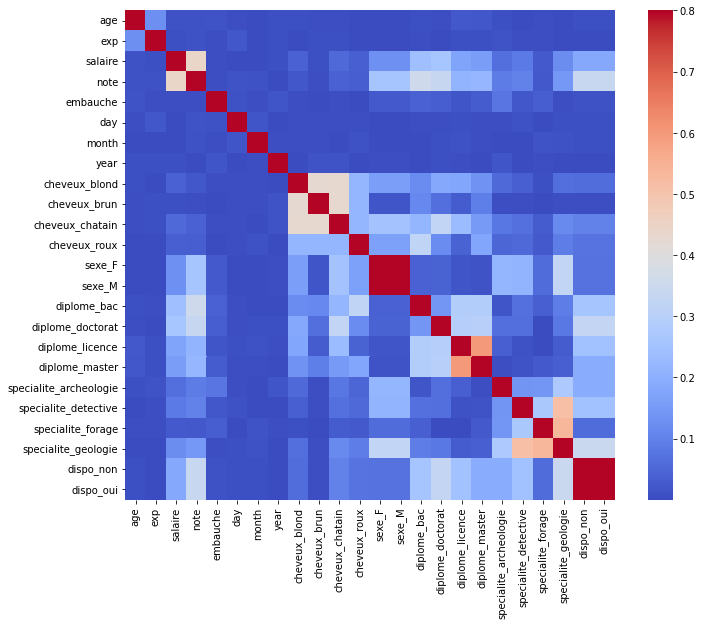

In [49]:
# Cette partie est uniquement à titre indicatif et visuel il est peu rigoureux mathématiquement d'utiliser un critère de corrélation de Pearson sur des varibales dummies
corrmat = pd.get_dummies(df_for_mod).corr().abs()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,cmap = 'coolwarm', vmax=.8, square=True);
# la matrice de corrélation est uniquement à titre indicatif étant donné que toutes nos variables ne sont pas continues,
# il serait imprudent de prendre ces valeurs comme base de raisonnement, néanmoins ils nous donnent quand même idée générale sur la dépendance entre les variables.
# on remarque d'ailleurs qu'hormis les variables dummies de même origine il n'y a que le salaire et la note qui sont assez corrélés.
# Etant donné qu'ils sont tous les 2 des variables continues alors leur coeffecient de corrélation a bien du sens.
# Mais il n'est pas assez important pour nous obliger à nous séparer de l'une des 2 variables.

In [ ]:
corrmat

,age,exp,salaire,note,embauche,day,month,year,cheveux_blond,cheveux_brun,...,diplome_bac,diplome_doctorat,diplome_licence,diplome_master,specialite_archeologie,specialite_detective,specialite_forage,specialite_geologie,dispo_non,dispo_oui
age,1.000000,0.128241,0.010342,0.009928,0.014210,0.004990,0.003231,0.007683,0.008566,0.005926,...,0.007837,0.003771,0.022674,0.019957,0.008561,0.002665,0.004602,0.002663,0.008759,0.008759
exp,0.128241,1.000000,0.009131,0.009699,0.006137,0.019261,0.001196,0.007900,0.002229,0.006586,...,0.003416,0.001743,0.007879,0.006765,0.013742,0.003586,0.004439,0.000355,0.002026,0.002026
salaire,0.010342,0.009131,1.000000,0.440963,0.006241,0.001075,0.002427,0.009512,0.038175,0.008600,...,0.241475,0.260497,0.174934,0.158382,0.064094,0.086661,0.026498,0.124365,0.184126,0.184126
note,0.009928,0.009699,0.440963,1.000000,0.003656,0.015813,0.011697,0.000207,0.021242,0.004895,...,0.357507,0.337561,0.211547,0.220260,0.089740,0.101357,0.023823,0.146971,0.338419,0.338419
embauche,0.014210,0.006137,0.006241,0.003656,1.000000,0.012542,0.004494,0.017691,0.005248,0.001080,...,0.038673,0.032360,0.018146,0.030331,0.075453,0.021433,0.032714,0.006368,0.012295,0.012295
day,0.004990,0.019261,0.001075,0.015813,0.012542,1.000000,0.016993,0.000382,0.004306,0.003618,...,0.004059,0.006254,0.007078,0.005503,0.004131,0.010304,0.001760,0.008960,0.007842,0.007842
month,0.003231,0.001196,0.002427,0.011697,0.004494,0.016993,1.000000,0.004374,0.003657,0.006228,...,0.000882,0.008854,0.011186,0.005667,0.002590,0.001237,0.013345,0.010744,0.008921,0.008921
year,0.007683,0.007900,0.009512,0.000207,0.017691,0.000382,0.004374,1.000000,0.000777,0.015543,...,0.001054,0.008538,0.005937,0.000669,0.018564,0.002004,0.006320,0.002509,0.000701,0.000701
cheveux_blond,0.008566,0.002229,0.038175,0.021242,0.005248,0.004306,0.003657,0.000777,1.000000,0.427285,...,0.120786,0.183745,0.177994,0.132779,0.054314,0.035133,0.008320,0.062701,0.061401,0.061401
cheveux_brun,0.005926,0.006586,0.008600,0.004895,0.001080,0.003618,0.006228,0.015543,0.427285,1.000000,...,0.115260,0.065641,0.028542,0.094671,0.005927,0.003338,0.002145,0.003913,0.006258,0.006258


### Dépendance statistique


*   Dépendance statistique significative entre la spécialité et le sexe.
*   Ce sont 2 variables qualitatives et donc on utilisera un test du khi 2.
*   Notre hypothèse nulle est que les 2 variables sont indépendantes.








In [50]:
# import de librairies
import scipy.stats as st

In [51]:
# Pour réaliser un test du khi 2 il nous faut commencer par avoir la matrice de contingence
X = "specialite"
Y = "sexe"
cont = new_df[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).copy().astype(int)
cont
# ensuite il nous suffit de passer la matrice dans le test du khi 2 de scipy
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
print("La P_value est :",st_p)
# Notre hypothèse nulle pour ce test et que les 2 variables sont indépendantes
# Or, la p_value est très très petite (tend vers 0), donc les 2 variables ne sont pas indépendantes statistiquement.

La P_value est : 0.0


Dépendance statistique significative entre la couleur de cheveux et le salaire.
Etant donné qu'on veut vérifier la dépendance statistique entre une variable catégorielle (couleur de cheveux) et une variable continue (salaire demandé) nous allons utiliser l'ANOVA (analyse de la variance)
L'idée est que notre hypothèse nulle est : tous les groupes (partagé selon les valeurs  de la variable catégorielle) ont la même moyenne.

In [52]:
fvalue, pvalue = st.f_oneway(new_df[new_df["cheveux"] == 'blond']["salaire"],
                                new_df[new_df["cheveux"] == 'brun']["salaire"],
                                new_df[new_df["cheveux"] == 'chatain']["salaire"],
                                new_df[new_df["cheveux"] == 'roux']["salaire"])
print("La P_value est :",pvalue)
# la p value est tellement petite <0.01 qu'on peut largement rejeter l'hypothèse nulle
# Ainsi, la couleur de cheveux et le salaire demandé ne sont pas indépendant.

La P_value est : 4.099696912172783e-15


Dependance statistique significative entre le nombre d'années d'expérience et la note à l'exercice
Nous voulons tester la dépendance statistique entre 2 variables quantitatives.
Commençons par voir sur un graphe si on peut définir une dépendance visuelle entre les 2

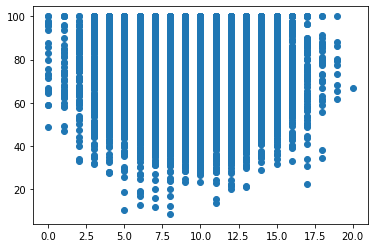

In [53]:
plt.scatter(new_df["exp"],new_df["note"])
# à priori il serait difficile d'assumer qu'il y a une dépendance claire entre les 2 variables

In [54]:
# Etant donné que nous avons un échantillon très grands nous n'avons pas besoin de vérifier que la loi du couple est binormale 
# pour utiliser le test paramétrique  sur le coefficient de corrélation linéaire (Bravais-Pearson)
df_test = new_df[["exp","note"]]
df_test.corr(method = 'pearson' )
# on remarque que la valeur du coefficient de corrélation linéaire est de 0.0125 en valeur absolue et donc il n'y a pas de corrélation forte entre l'expérience
# d'un candidat et la note de son évaluation.

,exp,note
exp,1.000000,-0.009699
note,-0.009699,1.000000


# Machine Learning
Préparer le jeu de données à la modélisation 

In [55]:
# Import des librairies
from sklearn.model_selection import train_test_split

In [56]:
# Tous les traitements qui ont déjà été réalisé sur ce dataframe sont totalement indépendants de valeurs des autres lignes.
# Ainsi, le même traitement est commun à la partie entraînement, validation et test.
# Pour rappel, nous avons supprimé les lignes avec valeurs manquantes et aberrantes. Et on a remis à l'échelle certaines valeurs aberrantes.
# Ensuite on a supprimer certaines colonnes jugées pas trop significatives.

# Avant d'avancer plus dans le traitement, il faut split la donnée entre le train, la validation et le test.
train,test = train_test_split(df_for_mod,test_size=0.2, random_state=42) # train 80%, test 20%
train, valid = train_test_split(train,test_size=0.25, random_state=42) # train 75%, validation 25%
print(train.shape)
print(valid.shape)
print(test.shape)

(9609, 13)
(3204, 13)
(3204, 13)


In [57]:
# encodage des variables catégorielles train
train = pd.get_dummies(train)
vae = "embauche" # VAE : variable à expliquer

In [58]:
# normalisation train
from sklearn.preprocessing import StandardScaler

cols = list(train.columns)
cols.remove(vae)
train_index = train.index

train_vae = train[vae]
train = train[cols]

scaler = StandardScaler()
scaler.fit(train) # on entraine le scaler sur le train et on l'applique pour transformer le train, test et validation.

train = pd.DataFrame(scaler.transform(train),index=train_index , columns = cols)
train[vae] = train_vae

In [59]:
# encodage et normalisation du test et de la validation
# Etant donné qu'on sait que les différentes valeurs des variables catégorielles présentes dans le test et la validation 
# sont déjà présente dans le train, on peut utiliser le get_dummies (mais il faut faire attention à avoir toutes les colonnes,
# cette méthode est risquée mais dans le cas de notre split elle marche bien)
valid = pd.get_dummies(valid)
test = pd.get_dummies(test)

# normalisation 
test_index = test.index

test_vae = test[vae]
test = test[cols]

test = pd.DataFrame(scaler.transform(test),index=test_index , columns = cols)
test[vae] = test_vae

valid_index = valid.index

valid_vae = valid[vae]
valid = valid[cols]

valid = pd.DataFrame(scaler.transform(valid),index=valid_index , columns = cols)
valid[vae] = valid_vae

In [60]:
# mise en forme avant la modélisation
x_train, y_train = train[cols], train[vae]
x_valid, y_valid = valid[cols], valid[vae]
x_test, y_test = test[cols], test[vae]


# Début de la modélisation

In [61]:
# import de librairies
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , f1_score, accuracy_score

In [ ]:
# Arbre de décision
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
CM = confusion_matrix(y_pred = y_pred,y_true = y_valid)
f1 = f1_score(y_pred = y_pred,y_true = y_valid)
accuracy = accuracy_score(y_pred = y_pred,y_true = y_valid)
print(CM)
print("F1: ",f1)
print("Accuracy :",accuracy)

[[2639  230]
 [ 178  157]]
F1:  0.4349030470914128
Accuracy : 0.8726591760299626


In [62]:
# import de librairies
from xgboost import XGBClassifier

In [63]:
### xgboost model learning####
model_xgb = XGBClassifier(learning_rate = 0.15, n_estimators=100, max_depth=20,gamma=0.05)
model_xgb.fit(x_train, y_train)
### xgboost model predict####
y_pred = model_xgb.predict(x_valid)
CM = confusion_matrix(y_pred = y_pred,y_true = y_valid)
f1 = f1_score(y_pred = y_pred,y_true = y_valid)
accuracy = accuracy_score(y_pred = y_pred,y_true = y_valid)
print(CM)
print("F1 :",f1)
print("Accuracy :",accuracy)

[[2828   41]
 [ 203  132]]
F1 : 0.5196850393700788
Accuracy : 0.9238451935081149


In [64]:
# import de librairies
from sklearn.ensemble import RandomForestClassifier

In [65]:
# random forest 
RF = RandomForestClassifier(n_estimators = 190,max_depth=19, random_state=70)
RF.fit(x_train, y_train)
y_pred =RF.predict(x_valid)
CM = confusion_matrix(y_pred = y_pred,y_true = y_valid)
f1 = f1_score(y_pred = y_pred,y_true = y_valid)
accuracy = accuracy_score(y_pred = y_pred,y_true = y_valid)
print(CM)
print("F1 :",f1)
print("Accuracy :",accuracy)

[[2850   19]
 [ 223  112]]
F1 : 0.48068669527896996
Accuracy : 0.9244694132334582


In [66]:
## On essaie de trouver les meilleurs paramètres pour le random forest via un grid search


n_estimatorss = [15,20,50,70,100,150,200,210]
max_depths = [5,8,10,15,19,20]

best_f1, best_n_estim, best_depth = 0,0,0

for n_estimators in n_estimatorss:
    for max_depth in max_depths:
        RF = RandomForestClassifier(n_estimators = n_estimators,max_depth=max_depth, random_state=70)
        RF.fit(x_train, y_train)
        y_pred = RF.predict(x_valid)
        f1 = f1_score(y_pred = y_pred,y_true = y_valid)
        accuracy = accuracy_score(y_pred = y_pred,y_true = y_valid)
        if f1 > best_f1:
            best_f1 , best_n_estim, best_depth = f1,n_estimators,max_depth
print("Les meilleurs paramètres sont :")
print("n_estimators",best_n_estim)
print("max_depth",best_depth)
print("Le meilleur f1 score est : ",best_f1)


KeyboardInterrupt: ignored

Les meilleurs paramètres sont :
n_estimators 15
max_depth 19
Le meilleur f1 score est : 0.5183673469387755

In [67]:
# Meilleur Random Forest sur la validation
best_model = RandomForestClassifier(n_estimators = 15,max_depth=19, random_state=70)
best_model.fit(x_train, y_train)
### xgboost model predict####
y_pred = best_model.predict(x_valid)
CM = confusion_matrix(y_pred = y_pred,y_true = y_valid)
f1 = f1_score(y_pred = y_pred,y_true = y_valid)
accuracy = accuracy_score(y_pred = y_pred,y_true = y_valid)
print(CM)
print("F1 :",f1)
print("Accuracy :",accuracy)

[[2841   28]
 [ 208  127]]
F1 : 0.5183673469387755
Accuracy : 0.9263420724094882


In [68]:
# Meilleur Random Forest sur le test
### xgboost model predict####
y_pred = best_model.predict(x_test)
CM = confusion_matrix(y_pred = y_pred,y_true = y_test)
f1 = f1_score(y_pred = y_pred,y_true = y_test)
accuracy = accuracy_score(y_pred = y_pred,y_true = y_test)
print(CM)
print("F1 :",f1)
print("Accuracy :",accuracy)

[[2803   32]
 [ 253  116]]
F1 : 0.44874274661508706
Accuracy : 0.9110486891385767


# Explication du modèle

In [69]:
#feature importance random forest
best_model.feature_importances_

array([0.08931875, 0.07385679, 0.14692774, 0.20756351, 0.08522208,
       0.07221567, 0.04478186, 0.01638261, 0.01130598, 0.02106215,
       0.01198459, 0.02279134, 0.01942167, 0.0114389 , 0.00891774,
       0.01713393, 0.01657763, 0.01876664, 0.02111945, 0.00709975,
       0.02286473, 0.02355353, 0.02969294])

Text(0.5, 0, 'Random Forest Feature Importance')

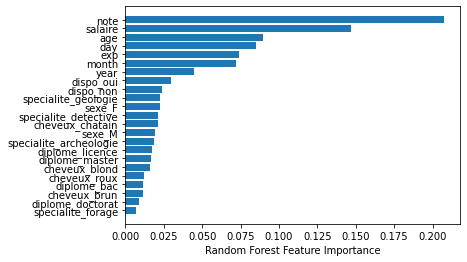

In [70]:
#feature importance random forest
sorted_idx = best_model.feature_importances_.argsort()
plt.barh(x_test.columns[sorted_idx], best_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

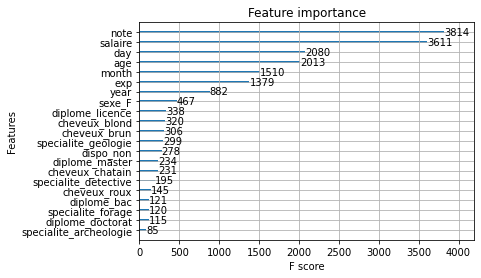

In [71]:
# feature importance xgboost
from xgboost import plot_importance
plot_importance(model_xgb)
plt.show()

# Réseaux de neurones

In [ ]:
# Import de librairies
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, concatenate , LSTM
from keras import Model
from keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)
cb_list=[es]
def base_NN():
    inputs = Input(shape=(len(list(x_train.columns)),))

    
    
    first_layer = Dense(20, activation='softplus')(inputs)
    second_layer = Dense(20, activation='sigmoid')(inputs)
    
    first_layer_1 = Dense(10, activation='sigmoid')(first_layer)
    second_layer_1 = Dense(10, activation='softplus')(second_layer)
       
    
    pre_out = concatenate([first_layer_1,second_layer_1])
    
    pre_out_out = Dense(5, activation='sigmoid')(pre_out)
    
    out = Dense(1,activation='softmax')(pre_out_out)
    
    loss_f = 'binary_crossentropy'
    
    model = Model(inputs=[inputs], outputs=[out])
    
    model.compile(optimizer='adam',loss=[loss_f],metrics=['accuracy'])
    
    model.fit(x_train,y_train, epochs=200,batch_size=16,callbacks=cb_list,validation_split=0.1)
    
    return model

In [ ]:
model = base_NN()
y_pred = model.predict(x_valid)
CM = confusion_matrix(y_pred = y_pred,y_true = y_valid)
f1 = f1_score(y_pred = y_pred,y_true = y_valid)
accuracy = accuracy_score(y_pred = y_pred,y_true = y_valid)
print(CM)
print("F1 :",f1)
print("Accuracy :",accuracy)

Epoch 1/200
541/541 [==============================] - 7s 9ms/step - loss: 0.3700 - accuracy: 0.1173 - val_loss: 0.3391 - val_accuracy: 0.1072
Epoch 2/200
541/541 [==============================] - 3s 5ms/step - loss: 0.3550 - accuracy: 0.1173 - val_loss: 0.3300 - val_accuracy: 0.1072
Epoch 3/200
541/541 [==============================] - 3s 5ms/step - loss: 0.3331 - accuracy: 0.1173 - val_loss: 0.3040 - val_accuracy: 0.1072
Epoch 4/200
541/541 [==============================] - 2s 4ms/step - loss: 0.3050 - accuracy: 0.1173 - val_loss: 0.2850 - val_accuracy: 0.1072
Epoch 5/200
541/541 [==============================] - 3s 5ms/step - loss: 0.2876 - accuracy: 0.1173 - val_loss: 0.2726 - val_accuracy: 0.1072
Epoch 6/200
541/541 [==============================] - 3s 5ms/step - loss: 0.2714 - accuracy: 0.1173 - val_loss: 0.2596 - val_accuracy: 0.1072
Epoch 7/200
541/541 [==============================] - 3s 5ms/step - loss: 0.2568 - accuracy: 0.1173 - val_loss: 0.2477 - val_accuracy: 0.1072